In [2]:
import os 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    classification_report
)
from sklearn.tree import export_graphviz
from scipy.sparse import issparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
from xgboost import plot_tree
#from pydotplus import graph_from_dot_file
import pickle

In [3]:
# figure saving path
figpath = "./figures/"
# Drive path:
path_google = "../../Data/GoogleDrive/"

log_final = pickle.load(open(path_google + 'logit_model_fixed.pkl', 'rb'))

In [9]:
log_final.best_estimator_.named_steps['clf']

LogisticRegression(C=0.002, l1_ratio=0.2, max_iter=1000, penalty='elasticnet',
                   random_state=69, solver='saga')

In [10]:
indir = '../../Data/GoogleDrive/'

X_train = indir + 'X_train.parquet'
X_test = indir + 'X_test.parquet'
y_train = indir + 'y_train.parquet'
y_test = indir + 'y_test.parquet'
test_predicted = indir + 'fixed_test_predicted.parquet'

X_train = pd.read_parquet(X_train)
X_test = pd.read_parquet(X_test)
y_train = pd.read_parquet(y_train)
y_test = pd.read_parquet(y_test)
test_predicted = pd.read_parquet(test_predicted)

In [15]:
# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# predict the test set
y_pred = log_final.best_estimator_.named_steps['clf'].predict(X_test_scaled)
y_pred_proba = log_final.best_estimator_.named_steps['clf'].predict_proba(X_test_scaled)[:,1]

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[79956  6902]
 [ 6461  5356]]


In [53]:
# display all column names of the test set
X_test.iloc[0].to_frame().T.columns[:56]

Index(['onehot__State_Alabama', 'onehot__State_Alaska',
       'onehot__State_Arizona', 'onehot__State_Arkansas',
       'onehot__State_California', 'onehot__State_Colorado',
       'onehot__State_Connecticut', 'onehot__State_Delaware',
       'onehot__State_District of Columbia', 'onehot__State_Florida',
       'onehot__State_Georgia', 'onehot__State_Guam', 'onehot__State_Hawaii',
       'onehot__State_Idaho', 'onehot__State_Illinois',
       'onehot__State_Indiana', 'onehot__State_Iowa', 'onehot__State_Kansas',
       'onehot__State_Kentucky', 'onehot__State_Louisiana',
       'onehot__State_Maine', 'onehot__State_Maryland',
       'onehot__State_Massachusetts', 'onehot__State_Michigan',
       'onehot__State_Minnesota', 'onehot__State_Mississippi',
       'onehot__State_Missouri', 'onehot__State_Montana',
       'onehot__State_Nebraska', 'onehot__State_Nevada',
       'onehot__State_New Hampshire', 'onehot__State_New Jersey',
       'onehot__State_New Mexico', 'onehot__State_New Yor

In [65]:
# convert to the encoded style from a normal entries

# get all state names in order
state_names = X_test.iloc[0].to_frame().T.columns[:54]

# only keep the state names after state_
state_names = [state[14:] for state in state_names]





In [71]:
# make a dictionary with the state names as values and the number 1 to 54 as keys
state_dict = dict(zip(range(0,55), state_names))

In [72]:
state_dict

{0: 'Alabama',
 1: 'Alaska',
 2: 'Arizona',
 3: 'Arkansas',
 4: 'California',
 5: 'Colorado',
 6: 'Connecticut',
 7: 'Delaware',
 8: 'District of Columbia',
 9: 'Florida',
 10: 'Georgia',
 11: 'Guam',
 12: 'Hawaii',
 13: 'Idaho',
 14: 'Illinois',
 15: 'Indiana',
 16: 'Iowa',
 17: 'Kansas',
 18: 'Kentucky',
 19: 'Louisiana',
 20: 'Maine',
 21: 'Maryland',
 22: 'Massachusetts',
 23: 'Michigan',
 24: 'Minnesota',
 25: 'Mississippi',
 26: 'Missouri',
 27: 'Montana',
 28: 'Nebraska',
 29: 'Nevada',
 30: 'New Hampshire',
 31: 'New Jersey',
 32: 'New Mexico',
 33: 'New York',
 34: 'North Carolina',
 35: 'North Dakota',
 36: 'Ohio',
 37: 'Oklahoma',
 38: 'Oregon',
 39: 'Pennsylvania',
 40: 'Puerto Rico',
 41: 'Rhode Island',
 42: 'South Carolina',
 43: 'South Dakota',
 44: 'Tennessee',
 45: 'Texas',
 46: 'Utah',
 47: 'Vermont',
 48: 'Virgin Islands',
 49: 'Virginia',
 50: 'Washington',
 51: 'West Virginia',
 52: 'Wisconsin',
 53: 'Wyoming'}

In [75]:
X_test.iloc[0].to_frame().T.columns[54:]

Index(['onehot__Sex_Female', 'onehot__Sex_Male',
       'onehot__PhysicalActivities_No', 'onehot__PhysicalActivities_Yes',
       'onehot__HadAsthma_No', 'onehot__HadAsthma_Yes',
       'onehot__HadSkinCancer_No', 'onehot__HadSkinCancer_Yes',
       'onehot__HadCOPD_No', 'onehot__HadCOPD_Yes',
       'onehot__HadDepressiveDisorder_No', 'onehot__HadDepressiveDisorder_Yes',
       'onehot__HadKidneyDisease_No', 'onehot__HadKidneyDisease_Yes',
       'onehot__HadArthritis_No', 'onehot__HadArthritis_Yes',
       'onehot__HadDiabetes_No',
       'onehot__HadDiabetes_No, pre-diabetes or borderline diabetes',
       'onehot__HadDiabetes_Yes',
       'onehot__HadDiabetes_Yes, but only during pregnancy (female)',
       'onehot__DeafOrHardOfHearing_No', 'onehot__DeafOrHardOfHearing_Yes',
       'onehot__BlindOrVisionDifficulty_No',
       'onehot__BlindOrVisionDifficulty_Yes',
       'onehot__DifficultyConcentrating_No',
       'onehot__DifficultyConcentrating_Yes', 'onehot__DifficultyWalking_N

<Axes: ylabel='Count'>

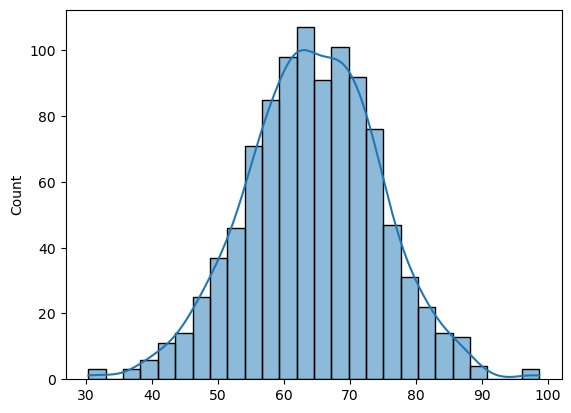

In [76]:
sns.histplot(np.random.normal(64.3, 10, 1000), kde=True)

Text(0, 0.5, 'Prevelance')

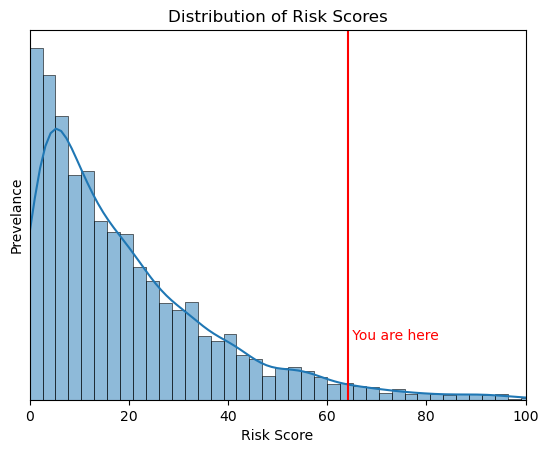

In [138]:
# plot a normal distribution that is skewed to the left ranges from 0 to 100

sns.histplot(np.random.exponential(20, 5000), kde=True)

#sns.histplot(np.random.normal(64.3, 10, 10000), kde=True)
# set the x-axis to range from 0 to 100
plt.xlim(0, 100)
# with a red line, mark the number 64.3
plt.axvline(64.3, color='red')
# with text mark the number 64.3
plt.text(64.3, 100, ' You are here', color='red')
# add a title
plt.title('Distribution of Risk Scores')
# add a label to the x-axis
plt.xlabel('Risk Score')
# remove y axis
plt.yticks([])
plt.ylabel('Prevelance')
